Reading image
Data processing
Ploting


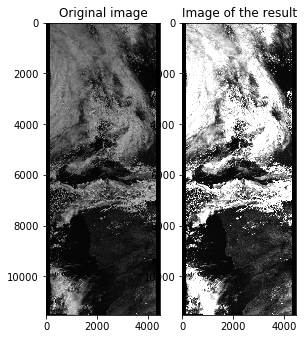

In [1]:
import snappy
import numpy as np
import matplotlib.pyplot as plt
#parameters for atithmetic transformation
a=1.15
b=0
#source image
file='/eodata/Envisat/Meris/FRS/2012/04/08/MER_FRS_1PPEPA20120408_105857_000005063113_00267_52867_0978.N1'


print("Reading image")
product = snappy.ProductIO.readProduct(file)
image = product.getBand('radiance_7')
w = image.getRasterWidth()
h = image.getRasterHeight()
imageData = np.zeros(w * h, np.float32)
image.readPixels(0, 0, w, h, imageData)

minV=np.amin(imageData)
maxV=np.amax(imageData)

print("Data processing")
# resultData = np.zeros(w * h, np.float32)
# for i in range(0,w * h):
#     r=imageData[i]*a+b
#     if r>maxV:
#         r=maxV
#     resultData[i]=r

resultData=imageData**a+b
resultData[resultData>maxV]=maxV

print("Ploting")
imageData.shape = h, w
resultData.shape = h, w
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(w/1000,h/1000))

ax1.imshow(imageData,cmap="gray")
ax2.imshow(resultData,cmap="gray")

ax1.set_title('Original image')
ax2.set_title('Image of the result')

plt.show()

# del imageData
# del resultData
# %reset out

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(1,1),dpi=50)
x = [1,2,3]
plt.plot(x, x)
plt.show()

In [ ]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()